In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

df = pd.read_excel('Concrete_Data.xls')

In [2]:
df.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [3]:
features = df[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']]

labels = df['Concrete compressive strength(MPa, megapascals) ']

In [4]:
features,labels = shuffle(features,labels)
split_size = 0.3
X,Xreal,y,yreal = train_test_split(features,labels,test_size=split_size,random_state=42)

In [5]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_Xreal = MinMaxScaler()
Xreal = scaler_Xreal.fit_transform(Xreal)

C:\Users\gjohn1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\gjohn1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3,label="val")
    plt.xlabel("Training test size")
    plt.ylabel("RSME")
    plt.legend()


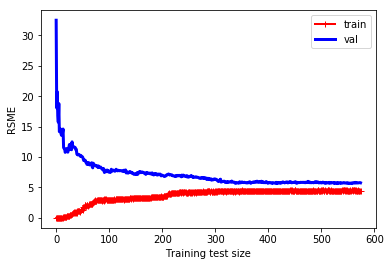

In [7]:
gbrt_initial = GradientBoostingRegressor(max_depth=2,n_estimators=120)
#plot_learning_curves(gbrt_intial,Xtrain,ytrain)
plot_learning_curves(gbrt_initial,X,y)

In [8]:
ypred_real = gbrt_initial.predict(Xreal)
error = mean_squared_error(yreal,ypred_real)
yreal = np.array(yreal)
for i in range(ypred_real.shape[0]):
    print("Predicted: {0}, Actual: {1}".format(ypred_real[i].round(4), yreal[i].round(4)))

Predicted: 35.0141, Actual: 40.0586
Predicted: 22.3877, Actual: 17.5403
Predicted: 42.2138, Actual: 32.8535
Predicted: 13.9574, Actual: 15.3408
Predicted: 34.9063, Actual: 37.8136
Predicted: 45.1949, Actual: 55.0202
Predicted: 17.9118, Actual: 21.9115
Predicted: 33.3145, Actual: 37.8109
Predicted: 41.8362, Actual: 39.1484
Predicted: 14.743, Actual: 21.1793
Predicted: 33.5529, Actual: 23.8359
Predicted: 36.9363, Actual: 44.8683
Predicted: 14.743, Actual: 21.16
Predicted: 28.6082, Actual: 24.0972
Predicted: 25.8135, Actual: 21.6495
Predicted: 36.7865, Actual: 43.3887
Predicted: 7.2789, Actual: 13.5206
Predicted: 28.2609, Actual: 25.3727
Predicted: 30.9702, Actual: 44.6091
Predicted: 12.4096, Actual: 14.8437
Predicted: 32.4425, Actual: 35.3012
Predicted: 40.912, Actual: 34.7358
Predicted: 29.6737, Actual: 33.3017
Predicted: 29.2877, Actual: 18.2849
Predicted: 45.1949, Actual: 53.655
Predicted: 12.8475, Actual: 14.6383
Predicted: 46.4297, Actual: 48.9873
Predicted: 61.3738, Actual: 58.5227

In [9]:
error

38.000510261724564

In [10]:
yreal.shape

(309,)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)
gbrt_tune1 = GradientBoostingRegressor(max_depth=2, n_estimators=700, random_state=42)
gbrt_tune1.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt_tune1.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=699, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
min_error = np.min(errors)
bst_n_estimators

699

Text(0.5,1,'Validation Error')

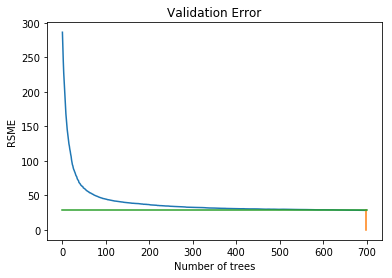

In [13]:
plt.plot(errors)
plt.plot([bst_n_estimators,bst_n_estimators],[0,min_error])
plt.plot([0,700],[min_error,min_error])
plt.xlabel("Number of trees")
plt.ylabel("RSME")
plt.title("Validation Error")

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)
gbrt_tune2 = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 1000):
    gbrt_tune2.n_estimators = n_estimators
    gbrt_tune2.fit(X_train, y_train)
    y_pred = gbrt_tune2.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [15]:
n_estimators_tuned = gbrt_tune2.n_estimators
print(gbrt_tune2.n_estimators)

319


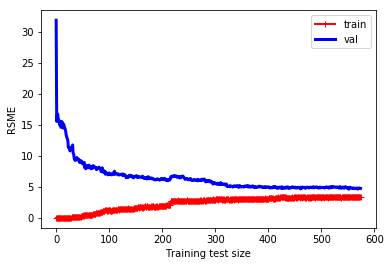

In [16]:
gbrt_final = GradientBoostingRegressor(max_depth=2,n_estimators=n_estimators_tuned)
#plot_learning_curves(gbrt_final,Xtrain,ytrain)
plot_learning_curves(gbrt_final,X,y)

In [17]:
ypred_real = gbrt_final.predict(Xreal)
error = mean_squared_error(yreal,ypred_real)
yreal = np.array(yreal)
for i in range(ypred_real.shape[0]):
    print("Predicted: {0}, Actual: {1}".format(ypred_real[i].round(4), yreal[i].round(4)))

Predicted: 35.6433, Actual: 40.0586
Predicted: 21.6645, Actual: 17.5403
Predicted: 41.6835, Actual: 32.8535
Predicted: 3.3101, Actual: 15.3408
Predicted: 39.1039, Actual: 37.8136
Predicted: 48.9772, Actual: 55.0202
Predicted: 10.401, Actual: 21.9115
Predicted: 34.2859, Actual: 37.8109
Predicted: 42.9131, Actual: 39.1484
Predicted: 15.3692, Actual: 21.1793
Predicted: 32.6056, Actual: 23.8359
Predicted: 35.6971, Actual: 44.8683
Predicted: 15.3692, Actual: 21.16
Predicted: 20.812, Actual: 24.0972
Predicted: 23.1036, Actual: 21.6495
Predicted: 37.4791, Actual: 43.3887
Predicted: 0.7357, Actual: 13.5206
Predicted: 28.5217, Actual: 25.3727
Predicted: 33.1177, Actual: 44.6091
Predicted: 11.8208, Actual: 14.8437
Predicted: 23.5136, Actual: 35.3012
Predicted: 39.2172, Actual: 34.7358
Predicted: 32.7464, Actual: 33.3017
Predicted: 24.3746, Actual: 18.2849
Predicted: 47.3592, Actual: 53.655
Predicted: 10.9464, Actual: 14.6383
Predicted: 47.5283, Actual: 48.9873
Predicted: 59.5746, Actual: 58.5227

In [18]:
error

42.71339542797631